## 实验介绍

### 1.实验内容

本实验介绍K均值聚类算法。并通过实验来了解二分k-均值算法。

### 2.实验目标

通过本实验掌握kMeans聚类算法。

### 3.实验知识点

* 聚类

### 4.实验环境

* python 3.6.5  

### 5.预备知识

* 初等数学知识  
* Linux命令基本操作  
* Python编程基础

## 准备工作

点击屏幕右上方的下载实验数据模块，选择下载kmeans_algo.tgz到指定目录下，然后再依次选择点击上方的File->Open->Upload,上传刚才下载的数据集压缩包，再使用如下命令解压：

In [1]:
!tar -zxvf kmeans_algo.tgz

kmeans_algo/
kmeans_algo/testSet.txt
kmeans_algo/testSet2.txt


## 【原理】无监督学习 

从本节开始，我们进入了无监督学习的深深海洋。在监督学习中，即我们讲过的分类和回归，其目标变量的值是已知的。但在无监督学习中，目标变量事先并不存在。

与之前“对于输入数据X能预测变量Y”不同的是，这里要回答的问题是：“从数据X中能发现什么？”

## 【原理】聚类算法 

我们先来介绍一下无监督学习中的聚类方法，聚类即将相似特征的数据聚集在一起，归到同一个簇中，它有点像全自动分类。聚类方法几乎可以应用于所有的数据对象，簇内的对象越相似，聚类效果越好。

用一个例子来帮助理解：

目前很常见的就是各个购物APP会为用户推荐商品，那么这个是怎么实现的呢？

APP会先收集用户的搜索记录，浏览记录等数据，因为这些数据都与用户的购物意向息息相关。然后，将这些信息输入到某个聚类算法中。接着，对聚类中的每一个簇，精心的选择，为其推荐相应的商品。最后，观察上述做法是否有效。

聚类和分类最大的不同在于，分类的目标事先已知，而聚类则不一样。聚类产生的结果与分类相同，而只是类别没有预先定义。也因此被称为无监督分类。

## 【原理】K-means聚类算法 

在本节，我们主要介绍K-均值聚类算法，并用该算法对数据进行分组。

在介绍K-均值聚类算法前，我们先讨论一下簇识别(cluster identification)。簇识别给出聚类结果的含义，即告诉我们每堆相似的数据到底是什么。

我们已经知道聚类是将相似数归到一个簇中，那么如何度量相似呢？其取决于所选择的相似度计算方法。

接下来，开始我们对K-means聚类算法的学习！

## 【实验】K-均值聚类算法 

K-均值是发现给定数据的k个簇的算法。而簇个数k是用户给定的，每个簇会通过其质心(centroid)，即簇中所有点的中心来描述。

我们先来了解一下该算法的工作流程：

    随机确定k个初始点作为质心
    当任意一个点的簇分配结果发生改变时：
        为每个点寻找距其最近的质心
        将其分配给该质心所对应的簇
        将每个簇的质心更新为该簇所有点的平均值

在算法的工作流程中，我们提到了寻找距其最近的质心。那么如何计算“最近”的距离呢？我们可以使用任何可以度量距离的计算方法。但不同的计算方法会影响数据集上K-均值算法的性能。

本节我们使用的距离函数为欧氏距离。
![](1_kmeans_algo.png)
下面给出该算法的代码实现。

## 【实验】代码实现 

[[ 3.8861344   4.08994234]
 [-1.72587401  2.38635025]
 [-4.61995805 -1.81639953]
 [ 2.09463176 -2.82863577]]
[[ 2.71358074  3.11839563]
 [-2.29801424  2.79388557]
 [-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]]
[[ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]]
[[ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]]


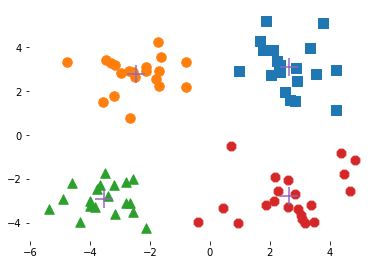

In [4]:
import matplotlib.pyplot as plt
from numpy import *

"""
函数说明：加载数据集
parameters:
    fileName -文件名
return:
    dataMat -数据列表
"""


def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))  #将数据转换为float型数据
        dataMat.append(fltLine)
    return dataMat


"""
函数说明：计算向量欧氏距离
parameters:
    vecA -向量A
    vecB -向量B
return：
    欧氏距离
"""


def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))  #此处也可以使用其他距离计算公式


"""
函数说明：为给定数据集构建一个包含k个随机质心的集合
parameters:
    dataSet -数据集
    k -质心个数
return：
    centroids -质心列表
"""


def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n)))  #创建存储质心的矩阵，初始化为0
    for j in range(n):  #随机质心必须再整个数据集的边界之内
        minJ = min(dataSet[:, j])
        rangeJ = float(max(dataSet[:, j]) - minJ)  #通过找到数据集每一维的最小和最大值
        centroids[:, j] = mat(minJ + rangeJ * random.rand(k, 1))  #生成0到1之间的随机数，确保质心落在边界之内
    return centroids


"""
函数说明：K-均值算法
parameters:
    dataSet -数据集
    k -簇个数
    distMeas -距离计算函数
    createCent -创建初始质心函数
return：
    centroids -质心列表
    clusterAssment -簇分配结果矩阵
"""


def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]  #确定数据集中数据点的总数
    clusterAssment = mat(zeros((m, 2)))  #创建矩阵来存储每个点的簇分配结果
    #第一列记录簇索引值，第二列存储误差
    centroids = createCent(dataSet, k)  #创建初始质心
    clusterChanged = True  #标志变量，若为True，则继续迭代
    while clusterChanged:
        clusterChanged = False
        for i in range(m):  #遍历所有数据找到距离每个点最近的质心
            minDist = inf;
            minIndex = -1
            for j in range(k):  #遍历所有质心
                distJI = distMeas(centroids[j, :], dataSet[i, :])  #计算质心与数据点之间的距离
                if distJI < minDist:
                    minDist = distJI;
                    minIndex = j
            if clusterAssment[i, 0] != minIndex: clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist ** 2  #将数据点分配到距其最近的簇，并保存距离平方和
        print(centroids)
        for cent in range(k):  #对每一个簇
            ptsInClust = dataSet[nonzero(clusterAssment[:, 0].A == cent)[0]]  #得到该簇中所有点的值
            centroids[cent, :] = mean(ptsInClust, axis=0)  #计算所有点的均值并更新为质心
    return centroids, clusterAssment


"""
函数说明：绘图
parameters：
    centList -质心列表
    myNewAssments -簇列表
    dataMat -数据集
    k -簇个数
return:
    null
"""


def drawDataSet(dataMat, centList, myNewAssments, k):
    fig = plt.figure()
    rect = [0.1, 0.1, 0.8, 0.8]  #绘制矩形
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']  #构建标记形状的列表用于绘制散点图
    ax1 = fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(k):  #遍历每个簇
        ptsInCurrCluster = dataMat[nonzero(myNewAssments[:, 0].A == i)[0], :]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]  #使用索引来选择标记形状
        ax1.scatter(ptsInCurrCluster[:, 0].flatten().A[0], ptsInCurrCluster[:, 1].flatten().A[0], marker=markerStyle,
                    s=90)
    ax1.scatter(centList[:, 0].flatten().A[0], centList[:, 1].flatten().A[0], marker='+', s=300)  #使用"+"来标记质心
    plt.show()


if __name__ == '__main__':
    dataMat = mat(loadDataSet('kmeans_algo/testSet.txt'))
    centList, myNewAssments = kMeans(dataMat, 4)
    print(centList)
    drawDataSet(dataMat, centList, myNewAssments, 4)

可以看到，上面的结果给出了4个质心，且经过5次迭代之后K-均值算法收敛，并在图中可以看到我们的簇分布。

[注]由于质心随机选择，运行结果可能有所不同，但每个质心列表中应有4个质心，即最终分为4个簇。

## 【实验】使用后处理来提高聚类性能 
到目前为止，我们看到K-均值聚类算法进行的很顺利，但还有些事情我们需要注意一下。

在最开始的时候，我们随机指定了k个质心，这导致数据最开始就被分成了k个簇，不断的更新每个簇，最终只能收敛到簇内的局部最小值，而非全局最小值，即最好结果。

前面提到过用户可以指定簇的个数k值，那么问题来了。用户如何才能知道，选择的k值是否合适？生成的簇的结果是否好呢？

即我们需要一个指标来度量聚类质量。在包含簇分配结果的矩阵中保存着每个点的误差(该点到质心的距离平方值)。

一种用于度量聚类效果的指标是SSE（sum of squared error,误差平方和），sse值越小表示数据点越接近它的质心，聚类效果越好。因为对误差取了平方，因此距离质心较远的点所占的比重会更大。

一种肯定可以降低sse值的方法是：增加簇的个数，但这并不会对数据分组有什么好的效果。聚类的目标是保持簇个数不变的情况下提高簇的质量。

还有一种方法是对生成的簇进行后处理。在保持簇总数不变的情况下，对某两个簇进行合并。具体做法是合并最近的质心，或者合并两个使得sse增幅最小的质心。

## 【实验】结果分析 
K-均值聚类

优点：容易实现

缺点：可能收敛到局部最小值，在大规模数据集上收敛较慢

使用数据类型：数值型数据

接下来，我们将讨论利用上述簇划分技术得到更好的聚类结果的方法。快进入下一节吧。

## 【实验】二分K-均值算法 
为克服K-均值算法收敛于局部最小值的问题，本节我们介绍一种二分K-均值(bisecting K-means)的算法。

该算法首先将所有点看作一个簇，然后将该簇一分为二。之后选择其中一个簇继续进行划分，选择哪一个簇则取决于对其划分是否可以最大程度降低SSE的值。

可以看出该算法是基于SSE的划分过程。最终划分的簇个数是用户指定的簇数目。
## 【实验】代码实现 
话不多说，我们按照该算法的工作流程给出以下代码。

[[ 2.88682938  4.52125541]
 [ 4.5220184   0.23310429]
 [-1.3873601   4.00114849]]
[[ 2.88304547  3.41274824]
 [ 0.35285279 -2.32700711]
 [-2.71580587  2.48817592]]
[[ 2.93386365  3.12782785]
 [-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]]
[[ 2.93386365  3.12782785]
 [-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]]


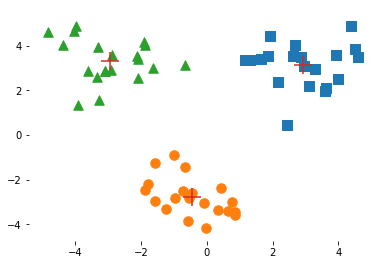

In [6]:
"""
函数说明：二分K-均值聚类算法
parameters:
    dataSet -数据集
    k -期望簇个数
    distMeas -距离计算函数
return：
    mat(centList) -质心列表矩阵
    clusterAssment -聚类结果
"""


def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]  #得到数据集中样本点的个数
    clusterAssment = mat(zeros((m, 2)))  #创建存储每个样本点的簇信息
    centroid0 = mean(dataSet, axis=0).tolist()[0]  #最初将所有的数据看作一个簇，计算其均值
    centList = [centroid0]  #创建质心列表
    for j in range(m):  #遍历所有数据
        clusterAssment[j, 1] = distMeas(mat(centroid0), dataSet[j, :]) ** 2  #计算每个样本点与质点的距离
    while (len(centList) < k):  #判断是否已经划分到用户指定的簇个数
        lowestSSE = inf  #将最小SSE设为无穷大
        for i in range(len(centList)):  #遍历所有簇
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:, 0].A == i)[0], :]  #得到该簇所有数据的值
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)  #在给定的簇上面进行K-均值聚类（k=2）
            sseSplit = sum(splitClustAss[:, 1])  #计算被划分的数据的误差
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:, 0].A != i)[0], 1])  #计算剩余数据的误差
            print("划分数据的误差, 未划分数据的误差: ", sseSplit, sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:  #如果该划分的误差平方和（SSE）值最小
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit  #将本次划分结果保存
        bestClustAss[nonzero(bestClustAss[:, 0].A == 1)[0], 0] = len(centList)  #由于使用二分均值聚类，会得到两个编号分别为0和1的结果簇
        bestClustAss[nonzero(bestClustAss[:, 0].A == 0)[0], 0] = bestCentToSplit  #需要将这些簇编号更新为新加簇的编号
        print('最佳划分簇为: ', bestCentToSplit)
        print('最佳簇的长度为: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0, :].tolist()[0]  #更新质心列表
        centList.append(bestNewCents[1, :].tolist()[0])  #将新的质心添加至列表
        clusterAssment[nonzero(clusterAssment[:, 0].A == bestCentToSplit)[0], :] = bestClustAss  #更新新的簇分配结果
    return mat(centList), clusterAssment


if __name__ == '__main__':
    dataMat = mat(loadDataSet('kmeans_algo/testSet2.txt'))
    centList, myNewAssments = kMeans(dataMat, 3)
    print(centList)
    drawDataSet(dataMat, centList, myNewAssments, 3)

现在我们运行下程序，看到聚类会收敛到全局最小值。

## 实验总结

本节我们介绍了K均值聚类算法，并实现了二分K-均值聚类算法，您应该能达到以下两个目标：

1. 掌握K均值聚类算法。

2. 学会实现相应算法。

## 参考文献与延伸阅读

### 参考资料:

1.哈林顿，李锐. 机器学习实战 : Machine learning in action[M]. 人民邮电出版社, 2013.  
2.周志华. 机器学习:Machine learning[M]. 清华大学出版社, 2016.

### 延伸阅读

1.李航. 统计学习方法[M]. 清华大学出版社, 2012.